# Linear Models

In [1]:
# basic imports
import os 
import numpy as np
import pandas as pd
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# visualization
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 300

# linear model
import statsmodels.api as sm
import statsmodels.formula.api as smf

def save_fig(filename, AXIS=False):
    plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0, wspace = 0)
    plt.margins(0,0)
    if not AXIS:
        plt.gca().xaxis.set_major_locator(plt.NullLocator())
        plt.gca().yaxis.set_major_locator(plt.NullLocator())
    plt.savefig(filename, dpi=300, bbox_inches = 'tight', pad_inches = 0, transparent=True) 
    return

In [2]:
df = pd.read_csv('results/irat_average_qdistances_filled.csv')

# filter by positive average qdistances
df = df[(df['HA Average Qdistance'] > 0) & (df['NA Average Qdistance'] > 0)]
df.corr()

,Potential Emergence Estimate,Potential Impact Estimate,HA Qnet Sample,NA Qnet Sample,HA Average Qdistance,NA Average Qdistance,Both Average Qdistance,Geometric Mean
Potential Emergence Estimate,1.000000,0.801516,0.117317,0.122822,-0.357059,-0.697325,-0.706604,-0.703703
Potential Impact Estimate,0.801516,1.000000,-0.256979,-0.254024,0.004992,-0.562500,-0.451331,-0.437505
HA Qnet Sample,0.117317,-0.256979,1.000000,0.999838,-0.465577,-0.158515,-0.315155,-0.335440
NA Qnet Sample,0.122822,-0.254024,0.999838,1.000000,-0.470155,-0.165806,-0.322818,-0.343628
HA Average Qdistance,-0.357059,0.004992,-0.465577,-0.470155,1.000000,0.289746,0.635994,0.675846
NA Average Qdistance,-0.697325,-0.562500,-0.158515,-0.165806,0.289746,1.000000,0.922820,0.860529
Both Average Qdistance,-0.706604,-0.451331,-0.315155,-0.322818,0.635994,0.922820,1.000000,0.964927
Geometric Mean,-0.703703,-0.437505,-0.335440,-0.343628,0.675846,0.860529,0.964927,1.000000


## Plot
- Uses geometric mean of HA and NA average qdistance vs IRAT score

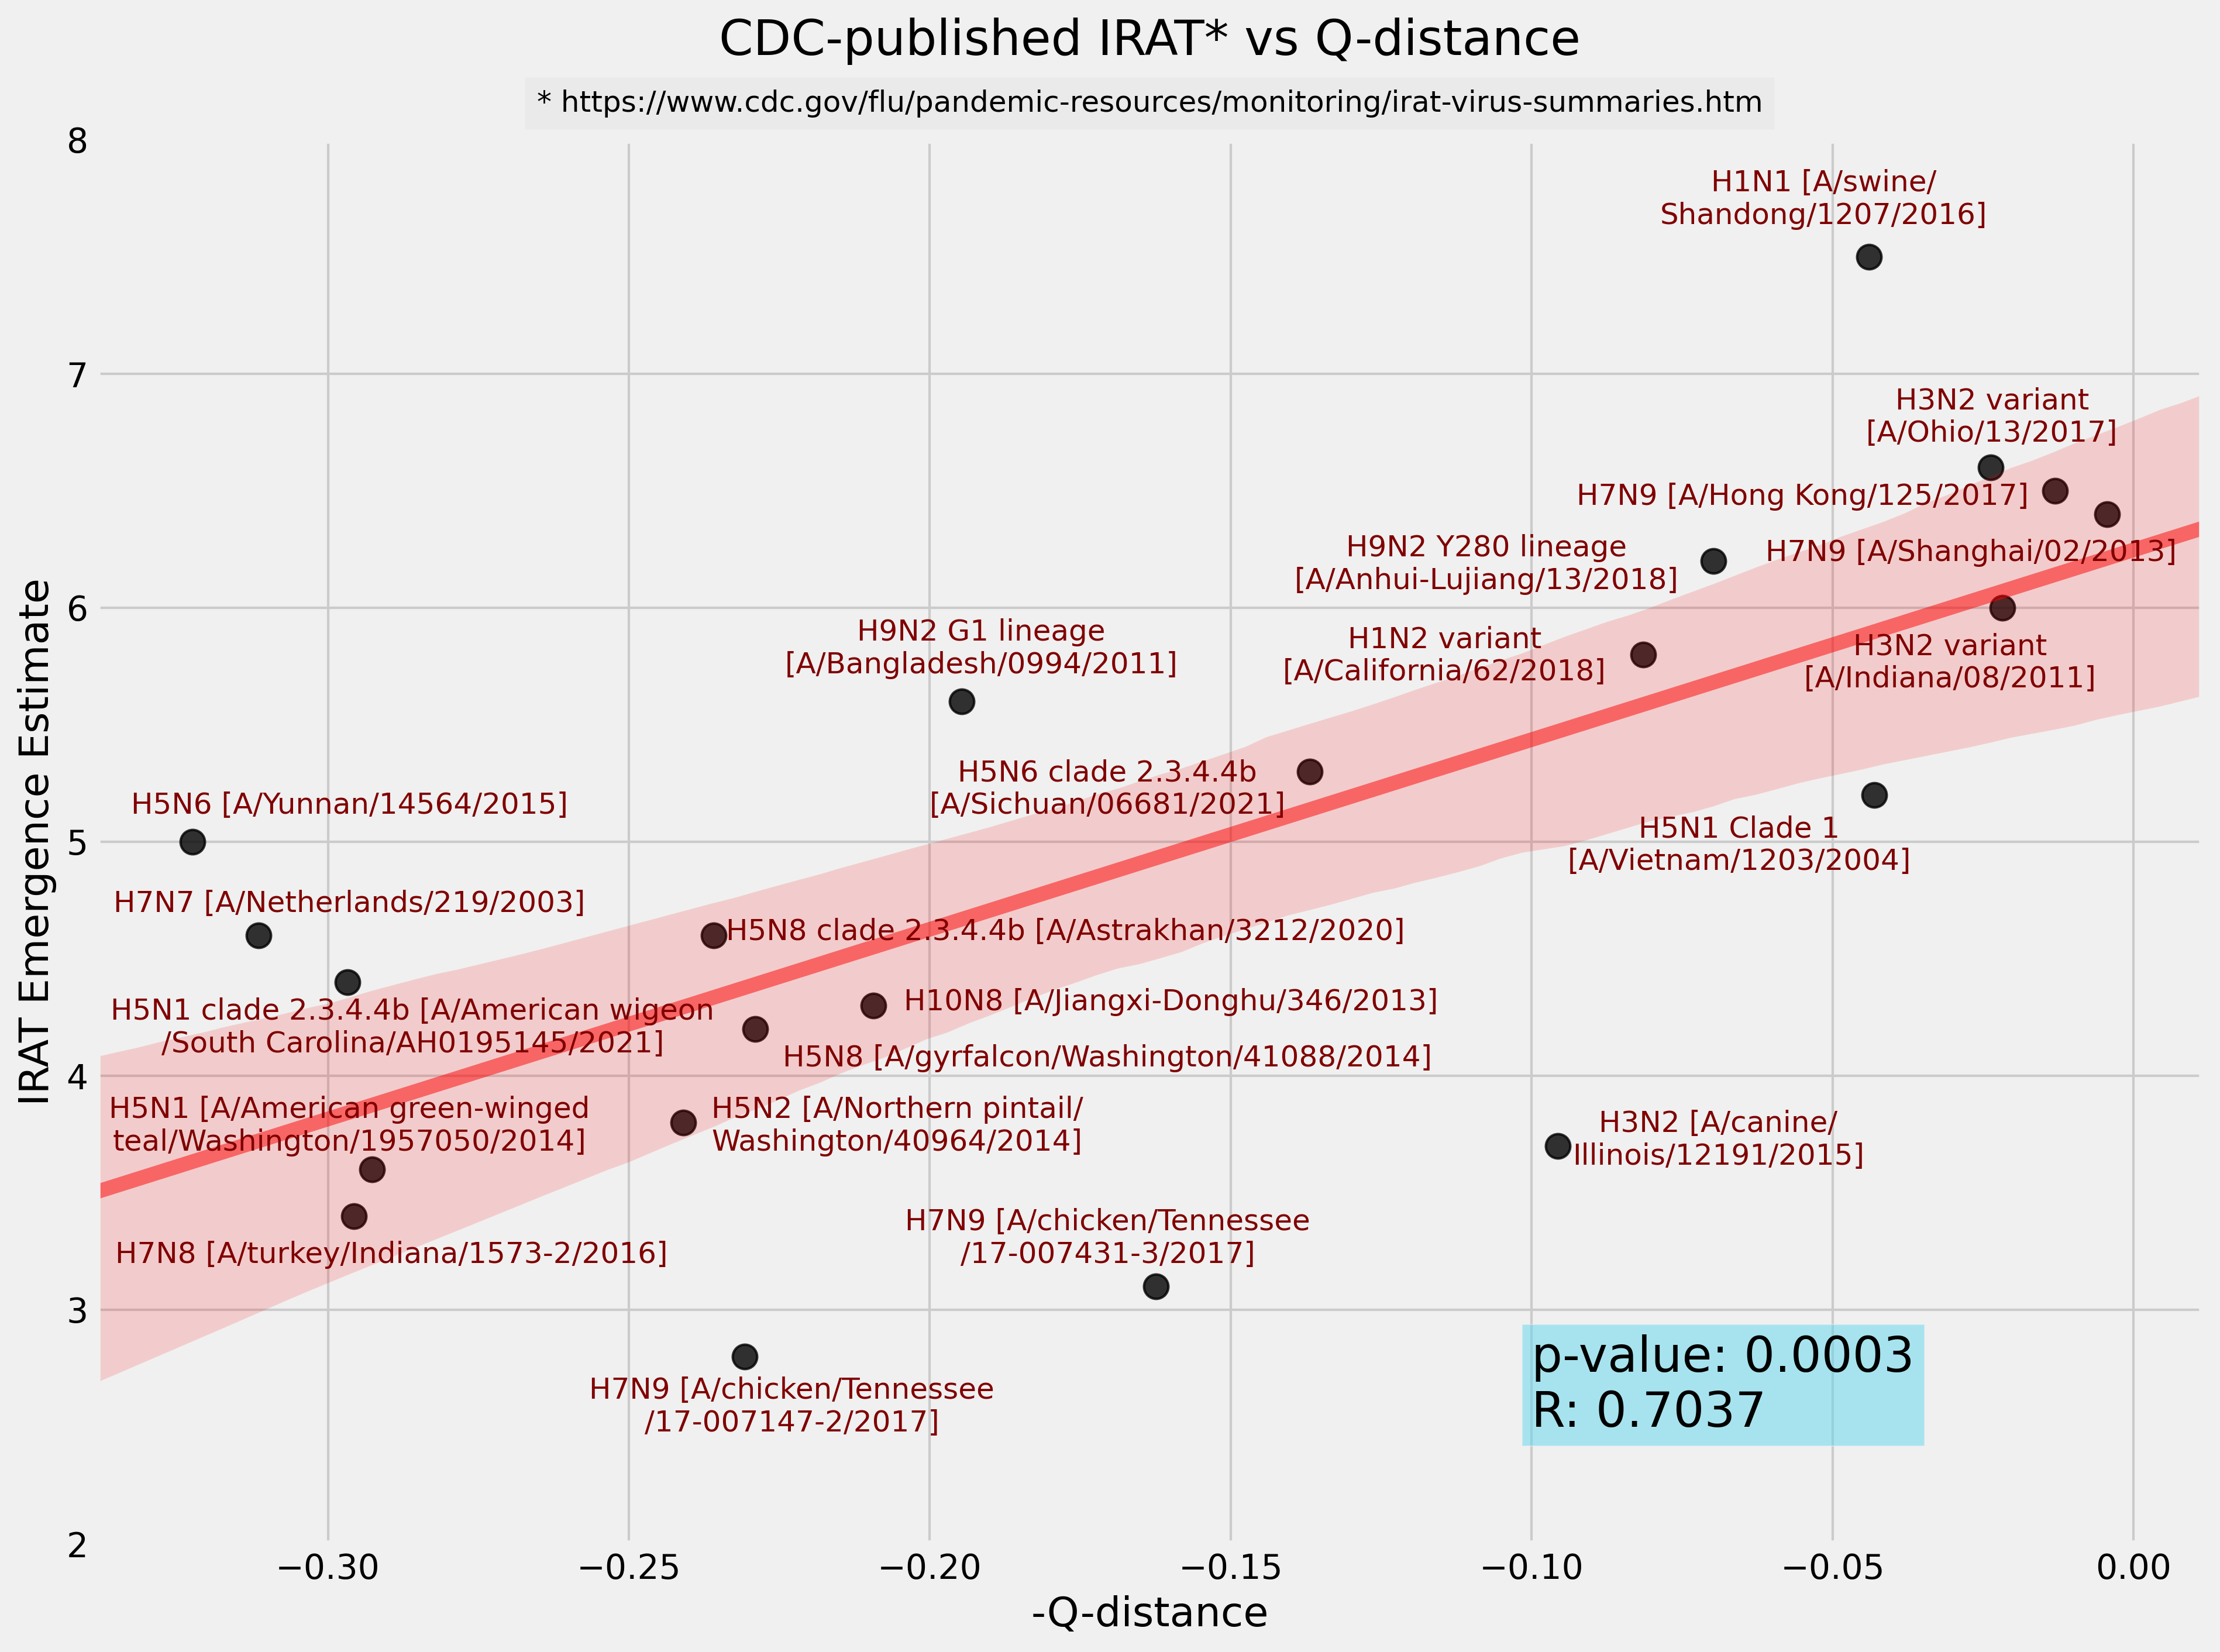

In [3]:
X = df['Geometric Mean']
Y = df['Potential Emergence Estimate']

slope, intercept, r, p, std_err = stats.linregress(-np.array(X), Y)

DF = pd.DataFrame([-np.array(X), Y]).transpose()
DF.columns = ['-Q-distance','IRAT Emergence Estimate']
ax = sns.regplot(x='-Q-distance', y='IRAT Emergence Estimate', data=DF, scatter_kws={"color": "black","s":100}, 
                 line_kws={"color": "red","alpha":.5}, truncate=False)
plt.text(-0.1, 2.5, "p-value: {:5.4f}\nR: {:5.4f}".format(p, r), bbox=dict(facecolor='#5fd8ed', alpha=0.5), fontsize=20);
plt.ylim(2, 8)
ax.set_title('CDC-published IRAT* vs Q-distance',y=1.05)
plt.figtext(0.5, 1.02, "* https://www.cdc.gov/flu/pandemic-resources/monitoring/irat-virus-summaries.htm", 
            ha="center", fontsize=12, bbox={"facecolor":".9", "alpha":0.5, "pad":5});

plt.figtext(0.33, 0.08, "H7N9 [A/chicken/Tennessee\n/17-007147-2/2017]", ha="center", fontsize=12, color='maroon');
plt.figtext(0.48, 0.2, "H7N9 [A/chicken/Tennessee\n/17-007431-3/2017]", ha="center", fontsize=12, color='maroon');
plt.figtext(0.14, 0.20, "H7N8 [A/turkey/Indiana/1573-2/2016]", ha="center", fontsize=12, color='maroon');
plt.figtext(0.12, 0.28, "H5N1 [A/American green-winged\nteal/Washington/1957050/2014]", ha="center", fontsize=12, color='maroon');
plt.figtext(0.77, 0.27, "H3N2 [A/canine/\nIllinois/12191/2015]", ha="center", fontsize=12, color='maroon');
plt.figtext(0.38, 0.28, "H5N2 [A/Northern pintail/\nWashington/40964/2014]", ha="center", fontsize=12, color='maroon');
plt.figtext(0.48, 0.34, "H5N8 [A/gyrfalcon/Washington/41088/2014]", ha="center", fontsize=12, color='maroon');
plt.figtext(0.51, 0.38, "H10N8 [A/Jiangxi-Donghu/346/2013]", ha="center", fontsize=12, color='maroon');
plt.figtext(0.15, 0.35, "H5N1 clade 2.3.4.4b [A/American wigeon\n/South Carolina/AH0195145/2021]", ha="center", fontsize=12, color='maroon');
plt.figtext(0.12, 0.45, "H7N7 [A/Netherlands/219/2003]", ha="center", fontsize=12, color='maroon');
plt.figtext(0.46, 0.43, "H5N8 clade 2.3.4.4b [A/Astrakhan/3212/2020]", ha="center", fontsize=12, color='maroon');
plt.figtext(0.12, 0.52, "H5N6 [A/Yunnan/14564/2015]", ha="center", fontsize=12, color='maroon');
plt.figtext(0.78, 0.48, "H5N1 Clade 1\n[A/Vietnam/1203/2004]", ha="center", fontsize=12, color='maroon');
plt.figtext(0.48, 0.52, "H5N6 clade 2.3.4.4b\n[A/Sichuan/06681/2021]", ha="center", fontsize=12, color='maroon');
plt.figtext(0.42, 0.62, "H9N2 G1 lineage\n[A/Bangladesh/0994/2011]", ha="center", fontsize=12, color='maroon');
plt.figtext(0.64, 0.615, "H1N2 variant\n[A/California/62/2018]", ha="center", fontsize=12, color='maroon');
plt.figtext(0.88, 0.61, "H3N2 variant\n[A/Indiana/08/2011]", ha="center", fontsize=12, color='maroon');
plt.figtext(0.66, 0.68, "H9N2 Y280 lineage\n[A/Anhui-Lujiang/13/2018]", ha="center", fontsize=12, color='maroon');
plt.figtext(0.89, 0.7, "H7N9 [A/Shanghai/02/2013]", ha="center", fontsize=12, color='maroon');
plt.figtext(0.81, 0.74, "H7N9 [A/Hong Kong/125/2017]", ha="center", fontsize=12, color='maroon');
plt.figtext(0.9, 0.785, "H3N2 variant\n[A/Ohio/13/2017]", ha="center", fontsize=12, color='maroon');
plt.figtext(0.82, 0.94, "H1N1 [A/swine/\nShandong/1207/2016]", ha="center", fontsize=12, color='maroon');

save_fig('figures/irat_qnet',AXIS=True)

In [4]:
coords_df = df[['Influenza Virus','Virus Type','Geometric Mean','Potential Emergence Estimate']].sort_values('Potential Emergence Estimate')
coords_df['Geometric Mean'] = coords_df['Geometric Mean']
coords_df

,Influenza Virus,Virus Type,Geometric Mean,Potential Emergence Estimate
21,A/chicken/Tennessee/17-007147-2/2017,H7N9,0.230738,2.8
20,A/chicken/Tennessee/17-007431-3/2017,H7N9,0.162405,3.1
19,A/turkey/Indiana/1573-2/2016,H7N8,0.295696,3.4
18,A/American green-winged teal/Washington/195705...,H5N1,0.292691,3.6
17,A/canine/Illinois/12191/2015,H3N2,0.095664,3.7
16,A/Northern pintail/Washington/40964/2014,H5N2,0.240980,3.8
15,A/gyrfalcon/Washington/41088/2014,H5N8,0.228980,4.2
14,A/Jiangxi-Donghu/346/2013,H10N8,0.209372,4.3
13,A/American wigeon/South Carolina/AH0195145/2021,H5N1,0.296734,4.4
12,A/Netherlands/219/2003,H7N7,0.311533,4.6


## Linear Model - Emergence Score

In [5]:
data = pd.read_csv('results/irat_average_qdistances_filled.csv')
data = data.rename(columns={'Potential Emergence Estimate':'IRAT_Emergence_Score',
                            'Geometric Mean':'Geometric_Mean',
                            'HA Average Qdistance':'HA_Avg_Qdist',
                            'NA Average Qdistance':'NA_Avg_Qdist'})
data = data[(data['HA_Avg_Qdist'] > 0) & (data['NA_Avg_Qdist'] > 0)]

In [6]:
# IRAT_Emergence_Score ~ Geometric_Mean
formula1 = 'IRAT_Emergence_Score ~ Geometric_Mean'
mod1 = smf.glm(formula=formula1, data=data).fit()
print(mod1.summary())

                  Generalized Linear Model Regression Results                   
Dep. Variable:     IRAT_Emergence_Score   No. Observations:                   22
Model:                              GLM   Df Residuals:                       20
Model Family:                  Gaussian   Df Model:                            1
Link Function:                 identity   Scale:                         0.86853
Method:                            IRLS   Log-Likelihood:                -28.618
Date:                  Fri, 04 Nov 2022   Deviance:                       17.371
Time:                          17:21:42   Pearson chi2:                     17.4
No. Iterations:                       3   Pseudo R-squ. (CS):             0.5919
Covariance Type:              nonrobust                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          6.246

In [7]:
# save to model_emergence_simple.txt
# with open("results/glm_models/model_emergence_simple.txt", "a") as f:
#     print(mod1.summary(), file=f)

In [8]:
# IRAT_Emergence_Score ~ Geometric_Mean + HA_Avg_Qdist*NA_Avg_Qdist
formula2 = 'IRAT_Emergence_Score ~ Geometric_Mean + HA_Avg_Qdist*NA_Avg_Qdist'
mod2 = smf.glm(formula=formula2, data=data).fit()
print(mod2.summary())

                  Generalized Linear Model Regression Results                   
Dep. Variable:     IRAT_Emergence_Score   No. Observations:                   22
Model:                              GLM   Df Residuals:                       17
Model Family:                  Gaussian   Df Model:                            4
Link Function:                 identity   Scale:                         0.69369
Method:                            IRLS   Log-Likelihood:                -24.357
Date:                  Fri, 04 Nov 2022   Deviance:                       11.793
Time:                          17:21:42   Pearson chi2:                     11.8
No. Iterations:                       3   Pseudo R-squ. (CS):             0.7797
Covariance Type:              nonrobust                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
In

In [9]:
# save to model_emergence_complex.txt
# with open("results/glm_models/model_emergence_complex.txt", "a") as f:
#     print(mod2.summary(), file=f)

## Linear Model - Impact Score

In [10]:
data = pd.read_csv('results/irat_average_qdistances_filled.csv')
data = data.rename(columns={'Potential Impact Estimate':'IRAT_Impact_Score',
                            'Geometric Mean':'Geometric_Mean',
                            'HA Average Qdistance':'HA_Avg_Qdist',
                            'NA Average Qdistance':'NA_Avg_Qdist'})
data = data[(data['HA_Avg_Qdist'] > 0) & (data['NA_Avg_Qdist'] > 0)]

In [11]:
# IRAT_Emergence_Score ~ Geometric_Mean
formula3 = 'IRAT_Impact_Score ~ Geometric_Mean'
mod3 = smf.glm(formula=formula3, data=data).fit()
print(mod3.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:      IRAT_Impact_Score   No. Observations:                   22
Model:                            GLM   Df Residuals:                       20
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                          1.2894
Method:                          IRLS   Log-Likelihood:                -32.964
Date:                Fri, 04 Nov 2022   Deviance:                       25.788
Time:                        17:21:42   Pearson chi2:                     25.8
No. Iterations:                     3   Pseudo R-squ. (CS):             0.1972
Covariance Type:            nonrobust                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          6.1434      0.434     14.

In [12]:
# save to model_impact_simple.txt
# with open("results/glm_models/model_impact_simple.txt", "a") as f:
#     print(mod3.summary(), file=f)

In [13]:
# IRAT_Emergence_Score ~ Geometric_Mean + HA_Avg_Qdist*NA_Avg_Qdist
formula4 = 'IRAT_Impact_Score ~ Geometric_Mean + HA_Avg_Qdist*NA_Avg_Qdist'
mod4 = smf.glm(formula=formula4, data=data).fit()
print(mod4.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:      IRAT_Impact_Score   No. Observations:                   22
Model:                            GLM   Df Residuals:                       17
Model Family:                Gaussian   Df Model:                            4
Link Function:               identity   Scale:                         0.77760
Method:                          IRLS   Log-Likelihood:                -25.614
Date:                Fri, 04 Nov 2022   Deviance:                       13.219
Time:                        17:21:42   Pearson chi2:                     13.2
No. Iterations:                     3   Pseudo R-squ. (CS):             0.6744
Covariance Type:            nonrobust                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

In [14]:
# save to model_impact_complex.txt
# with open("results/glm_models/model_impact_complex.txt", "a") as f:
#     print(mod4.summary(), file=f)

## Predicted IRAT Scores - IRAT at Time of Analysis

In [20]:
data = pd.read_csv('results/irat_average_qdistances_filled.csv')
data = data.rename(columns={'Potential Emergence Estimate':'IRAT_Emergence_Score',
                            'Potential Impact Estimate':'IRAT_Impact_Score',
                            'Geometric Mean':'Geometric_Mean',
                            'HA Average Qdistance':'HA_Avg_Qdist',
                            'NA Average Qdistance':'NA_Avg_Qdist'})
data = data[(data['HA_Avg_Qdist'] > 0) & (data['NA_Avg_Qdist'] > 0)]

df_irat = pd.read_csv('results/irat_average_qdistances_filled.csv')

df_irat['Predicted Emergence Score'] = mod2.predict(data)
df_irat['Predicted Impact Score'] = mod4.predict(data)

df_irat.to_csv('results/irat_predictions.csv')
df_irat

,Influenza Virus,Virus Type,Dates of Risk Assessment,Potential Emergence Estimate,Potential Impact Estimate,Summary Risk Score Category,HA Sequence,NA Sequence,HA Qnet Sample,NA Qnet Sample,HA Average Qdistance,NA Average Qdistance,Both Average Qdistance,Geometric Mean,Predicted Emergence Score,Predicted Impact Score
0,A/swine/Shandong/1207/2016,H1N1,Jul 2020,7.5,6.9,Moderate,MEARLFVLFCAFTTLKADTICVGYHANNSTDTVDTILEKNVTVTHS...,MNPNQKIITIGSICMTIGIASLILQIGNIISIWISHSIQIENQNQS...,1000.0,1000.0,0.094135,0.020530,0.057332,0.043961,6.043770,6.187258
1,A/Ohio/13/2017,H3N2,Jul 2019,6.6,5.8,Moderate,MKTIIALSHILCLVFAQKLPGNDNNMATLCLGHHAVPNGTIVKTIT...,MNPNQKIITIGSVSLIIATICFLMQIAILVTTITLHFKQHNCDSSP...,1000.0,1000.0,0.018431,0.030623,0.024527,0.023757,6.286471,6.153447
2,A/Hong Kong/125/2017,H7N9,May 2017,6.5,7.5,Moderate-High,MNTQILVFALIAIIPTNADKICLGHHAVSNGTKVNTLTERGVEVVN...,MNPNQKILCTSATAITIGAIAVLIGIANLGLNIGLHLKPGCNCSHS...,437.0,437.0,0.029599,0.005775,0.017687,0.013074,6.585211,6.540149
3,A/Shanghai/02/2013,H7N9,Apr 2016,6.4,7.2,Moderate-High,MNTQILVFALIAIIPTNADKICLGHHAVSNGTKVNTLTERGVEVVN...,MNPNQKILCTSATAIIIGAIAVLIGMANLGLNIGLHLKPGCNCSHS...,178.0,178.0,0.005495,0.003556,0.004525,0.004420,6.740483,6.620085
4,A/Anhui-Lujiang/39/2018,H9N2,Jul 2019,6.2,5.9,Moderate,METVSLITILLVATASNADKICIGYQSTNSTETVDTLTENNVPVTH...,MNPNQKITAIGSVSLIIAIICLLMQIAILTTTMTLHFGQKECSNPS...,31.0,30.0,0.029024,0.168090,0.098557,0.069847,5.196902,5.002380
5,A/Indiana/08/2011,H3N2,Dec 2012,6.0,4.5,Moderate,MKTIIAFSCILCLIFAQKLPGSDNSMATLCLGHHAVPNGTLVKTIT...,MNPNQKIITIGSVSLIIATICFLMQIAILVTTVTLHFKQHDYNSPP...,1000.0,1000.0,0.052311,0.009103,0.030707,0.021822,6.431361,6.457251
6,A/California/62/2018,H1N2,Jul 2019,5.8,5.7,Moderate,MKVKLMVLLCTFTATYADTICVGYHANNSTDTVDTVLEKNVTVTHS...,MNPNQKIITIGSISLTLAAMCFLMQTAILVTNVTLHFNQCECHYPP...,55.0,55.0,0.108902,0.060951,0.084926,0.081472,5.363065,5.483384
7,A/Bangladesh/0994/2011,H9N2,Feb 2014,5.6,5.4,Moderate,METVSLMTILLLVTTSNADKICIGHQSTNSTETVDTLTETNVPVTH...,MNPNQKIIALGSASLTIAIICLLIQIAILATTMTLHFMQNEHTNST...,-1.0,-1.0,0.207800,0.182338,0.195069,0.194653,4.338890,4.885887
8,A/Sichuan/06681/2021,H5N6,Oct 2021,5.3,6.3,Moderate,MENIVLLLAIVSLVKSDQICIGYHANNSTEQVDTIMEKNVTVTHAQ...,MNPNQKITCISATGVTLSIVSLLIGITNLGLNIGLHYKVSDSTTIN...,45.0,45.0,0.361591,0.051794,0.206692,0.136852,5.202812,6.415099
9,A/Vietnam/1203/2004,H5N1,Nov 2011,5.2,6.6,Moderate,MEKIVLLFAIVSLVKSDQICIGYHANNSTEQVDTIMEKNVTVTHAQ...,MNPNQKIITIGSICMVTGIVSLMLQIGNMISIWVSHSIHTGNQHQS...,258.0,246.0,0.167254,0.011074,0.091342,0.043037,6.218132,6.701150


## Predicted IRAT Scores - IRAT at Current Time

In [15]:
data_cur = pd.read_csv('results/irat_average_qdistances_current.csv')
data_cur = data_cur.rename(columns={'Potential Emergence Estimate':'IRAT_Emergence_Score',
                                    'Potential Impact Estimate':'IRAT_Impact_Score',
                                    'Geometric Mean':'Geometric_Mean',
                                    'HA Average Qdistance':'HA_Avg_Qdist',
                                    'NA Average Qdistance':'NA_Avg_Qdist'})
data_cur = data_cur[(data_cur['HA_Avg_Qdist'] > 0) & (data_cur['NA_Avg_Qdist'] > 0)]

df_irat_cur = pd.read_csv('results/irat_average_qdistances_current.csv')

df_irat_cur['Predicted Emergence Score'] = mod2.predict(data_cur)
df_irat_cur['Predicted Impact Score'] = mod4.predict(data_cur)

df_irat_cur.to_csv('results/irat_predictions_current.csv')
df_irat_cur

,Influenza Virus,Virus Type,Dates of Risk Assessment,Potential Emergence Estimate,Potential Impact Estimate,Summary Risk Score Category,HA Sequence,NA Sequence,HA Qnet Sample,NA Qnet Sample,HA Average Qdistance,NA Average Qdistance,Both Average Qdistance,Geometric Mean,Predicted Emergence Score,Predicted Impact Score
0,A/swine/Shandong/1207/2016,H1N1,Jul 2020,7.5,6.9,Moderate,MEARLFVLFCAFTTLKADTICVGYHANNSTDTVDTILEKNVTVTHS...,MNPNQKIITIGSICMTIGIASLILQIGNIISIWISHSIQIENQNQS...,1000,1000,0.059891,0.041687,0.050789,0.049967,5.827981,5.799183
1,A/Ohio/13/2017,H3N2,Jul 2019,6.6,5.8,Moderate,MKTIIALSHILCLVFAQKLPGNDNNMATLCLGHHAVPNGTIVKTIT...,MNPNQKIITIGSVSLIIATICFLMQIAILVTTITLHFKQHNCDSSP...,1000,1000,0.009133,0.069184,0.039159,0.025137,6.169680,5.998393
2,A/Hong Kong/125/2017,H7N9,May 2017,6.5,7.5,Moderate-High,MNTQILVFALIAIIPTNADKICLGHHAVSNGTKVNTLTERGVEVVN...,MNPNQKILCTSATAITIGAIAVLIGIANLGLNIGLHLKPGCNCSHS...,1000,1000,0.009190,0.004615,0.006903,0.006513,6.697171,6.585038
3,A/Shanghai/02/2013,H7N9,Apr 2016,6.4,7.2,Moderate-High,MNTQILVFALIAIIPTNADKICLGHHAVSNGTKVNTLTERGVEVVN...,MNPNQKILCTSATAIIIGAIAVLIGMANLGLNIGLHLKPGCNCSHS...,1000,1000,0.003082,0.004365,0.003740,0.003668,6.751940,6.623885
4,A/Anhui-Lujiang/39/2018,H9N2,Jul 2019,6.2,5.9,Moderate,METVSLITILLVATASNADKICIGYQSTNSTETVDTLTENNVPVTH...,MNPNQKITAIGSVSLIIAIICLLMQIAILTTTMTLHFGQKECSNPS...,58,58,0.015745,0.046728,0.031236,0.027124,6.181463,6.027433
5,A/Indiana/08/2011,H3N2,Dec 2012,6.0,4.5,Moderate,MKTIIAFSCILCLIFAQKLPGSDNSMATLCLGHHAVPNGTLVKTIT...,MNPNQKIITIGSVSLIIATICFLMQIAILVTTVTLHFKQHDYNSPP...,1000,1000,0.017557,0.018402,0.017980,0.017975,6.431184,6.313610
6,A/California/62/2018,H1N2,Jul 2019,5.8,5.7,Moderate,MKVKLMVLLCTFTATYADTICVGYHANNSTDTVDTVLEKNVTVTHS...,MNPNQKIITIGSISLTLAAMCFLMQTAILVTNVTLHFNQCECHYPP...,37,37,0.203827,0.047728,0.125777,0.098632,5.328429,5.852048
7,A/Bangladesh/0994/2011,H9N2,Feb 2014,5.6,5.4,Moderate,METVSLMTILLLVTTSNADKICIGHQSTNSTETVDTLTETNVPVTH...,MNPNQKIIALGSASLTIAIICLLIQIAILATTMTLHFMQNEHTNST...,58,58,0.047339,0.465388,0.256364,0.148429,3.756867,3.615813
8,A/Sichuan/06681/2021,H5N6,Oct 2021,5.3,6.3,Moderate,MENIVLLLAIVSLVKSDQICIGYHANNSTEQVDTIMEKNVTVTHAQ...,MNPNQKITCISATGVTLSIVSLLIGITNLGLNIGLHYKVSDSTTIN...,46,46,0.344316,0.059989,0.202152,0.143719,5.096373,6.227299
9,A/Vietnam/1203/2004,H5N1,Nov 2011,5.2,6.6,Moderate,MEKIVLLFAIVSLVKSDQICIGYHANNSTEQVDTIMEKNVTVTHAQ...,MNPNQKIITIGSICMVTGIVSLMLQIGNMISIWVSHSIHTGNQHQS...,48,45,0.132348,0.041099,0.088164,0.073752,5.562177,5.803725
